In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.manifold import TSNE

In [3]:
ingredient_to_category = {
    # Nuts
    "peanuts": "Nuts",
    "cashew": "Nuts",
    "chestnuts": "Nuts",
    "pistachios": "Nuts",
    "almond": "Nuts",
    "hazelnut": "Nuts",
    "walnuts": "Nuts",
    "pecans": "Nuts",
    "brazil_nut": "Nuts",
    "pili_nut": "Nuts",
    
    # Spices
    "cumin": "Spices",
    "star_anise": "Spices",
    "nutmeg": "Spices",
    "cloves": "Spices",
    "ginger": "Spices",
    "allspice": "Spices",
    "chervil": "Spices",
    "mustard": "Spices",
    "cinnamon": "Spices",
    "saffron": "Spices",
    
    # Herbs
    "angelica": "Herbs",
    "garlic": "Herbs",
    "chives": "Herbs",
    "turnip": "Herbs",
    "dill": "Herbs",
    "mugwort": "Herbs",
    "chamomile": "Herbs",
    "coriander": "Herbs",
    "oregano": "Herbs",
    "mint": "Herbs",
    
    # Fruits
    "kiwi": "Fruits",
    "pineapple": "Fruits",
    "banana": "Fruits",
    "lemon": "Fruits",
    "mandarin_orange": "Fruits",
    "strawberry": "Fruits",
    "apple": "Fruits",
    "mango": "Fruits",
    "peach": "Fruits",
    "pear": "Fruits",
    
    # Vegetables
    "cauliflower": "Vegetables",
    "brussel_sprouts": "Vegetables",
    "broccoli": "Vegetables",
    "sweet_potato": "Vegetables",
    "asparagus": "Vegetables",
    "avocado": "Vegetables",
    "radish": "Vegetables",
    "tomato": "Vegetables",
    "potato": "Vegetables",
    "cabbage": "Vegetables",
}


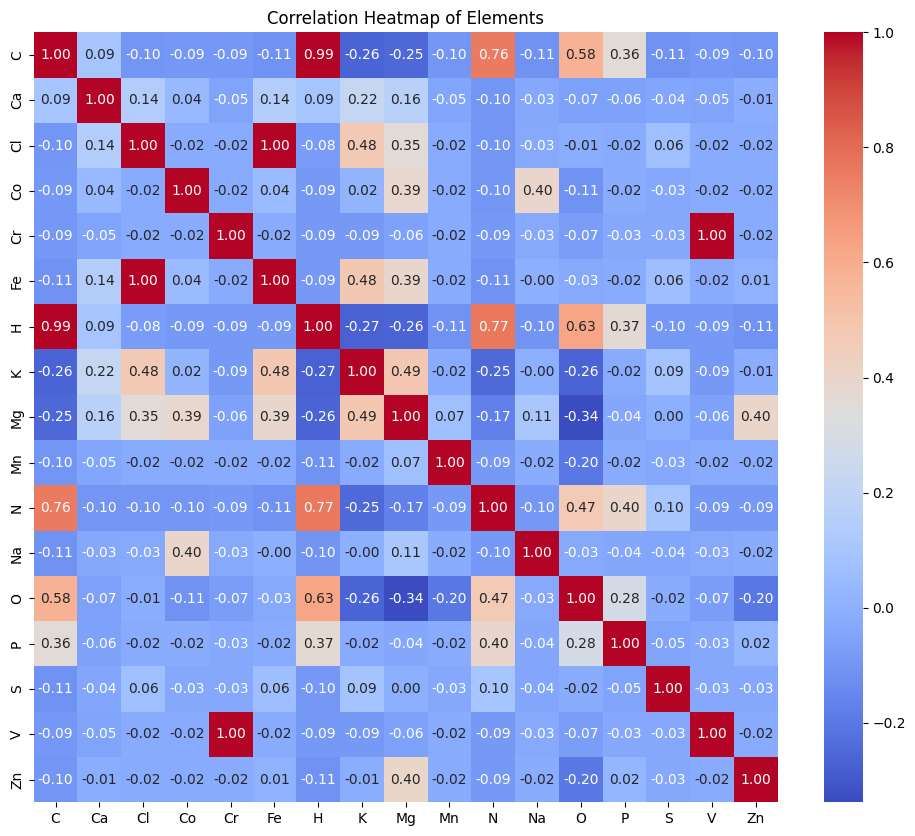

In [4]:
df = pd.read_csv("/home/dewei/workspace/smell-net/processed_full_gcms_dataframe.csv")

# Compute correlation matrix (excluding food_name)
corr = df.drop(columns=['food_name']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Elements")
plt.show()

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process GC-MS data
df = pd.read_csv("/home/dewei/workspace/smell-net/processed_full_gcms_dataframe.csv")
df['category'] = df['food_name'].map(ingredient_to_category)
features = df.drop(columns=['food_name', 'category'])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
explained_var = pca.explained_variance_ratio_

# Add PCA results back to dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plotting
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(10, 8))
palette = sns.color_palette("tab10")  # Good for up to 10 vibrant classes

plot = sns.scatterplot(
    data=df,
    x='PCA1', y='PCA2',
    hue='category',
    palette=palette,
    s=40,               # Bigger dots for visibility
    alpha=0.7,
    linewidth=0
)

# Title and axis labels with variance
plt.title("PCA of GC-MS Features by Ingredient Category", fontsize=18)
plt.xlabel(f"Principal Component 1 ({explained_var[0]*100:.1f}% variance)", fontsize=14)
plt.ylabel(f"Principal Component 2 ({explained_var[1]*100:.1f}% variance)", fontsize=14)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend formatting
plt.legend(
    title="Category",
    title_fontsize=14,
    fontsize=12,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    markerscale=1.5
)

# Save or show
plt.tight_layout()
plt.savefig("/home/dewei/workspace/smell-net/data_stats/PCA_gcms_category.png", dpi=300)
plt.close()


/tmp/ipykernel_1842769/2128875753.py:25: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  plot = sns.scatterplot(


In [ ]:
df = pd.read_csv("/home/dewei/workspace/smell-net/processed_full_gcms_dataframe.csv")
df['category'] = df['food_name'].map(ingredient_to_category)
features = df.drop(columns=['food_name', 'category'])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(features)

# Add results back to dataframe
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='category', data=df, legend=False)
plt.title("t-SNE Scatter Plot of Foods")
plt.show()